<a href="https://colab.research.google.com/github/mrahma15/MyRepos/blob/main/Homework_1_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [231]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [232]:
#def model(t_u, w, b):
#    return w * t_u + b

def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b


In [233]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [234]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

#t_p = model(t_u, w, b)
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [235]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [236]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [237]:
learning_rate = 1e-2
delta = 0.1


In [238]:
loss_rate_of_change_w2 = \
    (loss_fn(model(t_u, w1, w2 + delta, b), t_c) - 
     loss_fn(model(t_u, w1, w2 - delta, b), t_c)) / (2.0 * delta)

w2 = w2 - learning_rate * loss_rate_of_change_w2

In [239]:
loss_rate_of_change_w1 = \
    (loss_fn(model(t_u, w1 + delta, w2, b), t_c) - 
     loss_fn(model(t_u, w1 - delta, w2, b), t_c)) / (2.0 * delta)

w1 = w1 - learning_rate * loss_rate_of_change_w1

In [240]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w1, w2, b + delta), t_c) - 
     loss_fn(model(t_u, w1, w2, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [241]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [242]:
def dmodel_dw1(t_u, w1, w2, b):
    return t_u

In [243]:
def dmodel_dw2(t_u, w1, w2, b):
    return 2 * t_u

In [244]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [245]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])  # <1>

In [246]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params

        t_p = model(t_u, w1, w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [247]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params

        t_p = model(t_u, w1, w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [248]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-1, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 11709471.000000
    Params: tensor([-36180.0273, -72361.0547,   -596.4196])
    Grad:   tensor([361810.2500, 723620.5000,   5964.1958])
Epoch 2, Loss 60846054358122496.000000
    Params: tensor([2.6067e+09, 5.2133e+09, 4.2934e+07])
    Grad:   tensor([-2.6067e+10, -5.2134e+10, -4.2935e+08])
Epoch 3, Loss 315828439279924161915387904.000000
    Params: tensor([-1.8780e+14, -3.7560e+14, -3.0932e+12])
    Grad:   tensor([1.8780e+15, 3.7560e+15, 3.0933e+13])
...


tensor([-9.7479e+23, -1.9496e+24, -1.6056e+22])

In [249]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 11709471.000000
    Params: tensor([-3617.1025, -7235.2051,   -59.6420])
    Grad:   tensor([361810.2500, 723620.5000,   5964.1958])
Epoch 2, Loss 608308431945728.000000
    Params: tensor([26060076.0000, 52120152.0000,   429234.5625])
    Grad:   tensor([-2.6064e+09, -5.2127e+09, -4.2929e+07])
Epoch 3, Loss 31567049342930626019328.000000
    Params: tensor([-1.8773e+11, -3.7546e+11, -3.0921e+09])
    Grad:   tensor([1.8775e+13, 3.7551e+13, 3.0925e+11])
...


tensor([-9.7418e+18, -1.9484e+19, -1.6046e+17])

In [250]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 11709471.000000
    Params: tensor([-360.8103, -722.6205,   -5.9642])
    Grad:   tensor([361810.2500, 723620.5000,   5964.1958])
Epoch 2, Loss 6067904315392.000000
    Params: tensor([259950.5781, 519900.1562,   4281.6113])
    Grad:   tensor([-2.6031e+08, -5.2062e+08, -4.2876e+06])
Epoch 3, Loss 3140961123172352000.000000
    Params: tensor([-1.8703e+08, -3.7405e+08, -3.0805e+06])
    Grad:   tensor([1.8729e+11, 3.7457e+11, 3.0848e+09])
...


tensor([-5.0113e+19, -1.0023e+20, -8.2541e+17])

In [251]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 11709471.000000
    Params: tensor([-35.1810, -71.3620,  -0.5964])
    Grad:   tensor([361810.2500, 723620.5000,   5964.1958])
Epoch 2, Loss 59171246080.000000
    Params: tensor([2535.3694, 5069.7388,   41.7425])
    Grad:   tensor([-25705504.0000, -51411008.0000,   -423389.6875])
Epoch 3, Loss 298671992209408.000000
    Params: tensor([-180094.3125, -360189.6250,   -2966.3459])
    Grad:   tensor([1.8263e+09, 3.6526e+09, 3.0081e+07])
...
Epoch 10, Loss inf
    Params: tensor([1.6456e+18, 3.2912e+18, 2.7104e+16])
    Grad:   tensor([-1.6687e+22, -3.3375e+22, -2.7486e+20])


tensor([1.6456e+18, 3.2912e+18, 2.7104e+16])

In [252]:
t_un = 0.1 * t_u

In [253]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 675.794373
    Params: tensor([-1.7968, -4.5936, -0.4818])
    Grad:   tensor([279.6790, 559.3579,  48.1760])
Epoch 2, Loss 31929.195312
    Params: tensor([17.0868, 33.1735,  2.6258])
    Grad:   tensor([-1888.3546, -3776.7092,  -310.7540])
Epoch 3, Loss 1443514.250000
    Params: tensor([-110.3973, -221.7947,  -18.4982])
    Grad:   tensor([12748.4102, 25496.8203,  2112.4026])
...
Epoch 10, Loss 590417403150598144.000000
    Params: tensor([7.0978e+07, 1.4196e+08, 1.1751e+07])
    Grad:   tensor([-8.1491e+09, -1.6298e+10, -1.3491e+09])
Epoch 11, Loss 26910232629492056064.000000
    Params: tensor([-4.7918e+08, -9.5837e+08, -7.9330e+07])
    Grad:   tensor([5.5016e+10, 1.1003e+11, 9.1081e+09])
...


tensor([6.3631e+17, 1.2726e+18, 1.0534e+17])

In [254]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 675.794373
Epoch 2, Loss 31929.195312
Epoch 3, Loss 1443514.250000
...
Epoch 10, Loss 590417403150598144.000000
Epoch 11, Loss 26910232629492056064.000000
...


tensor([6.3631e+17, 1.2726e+18, 1.0534e+17])

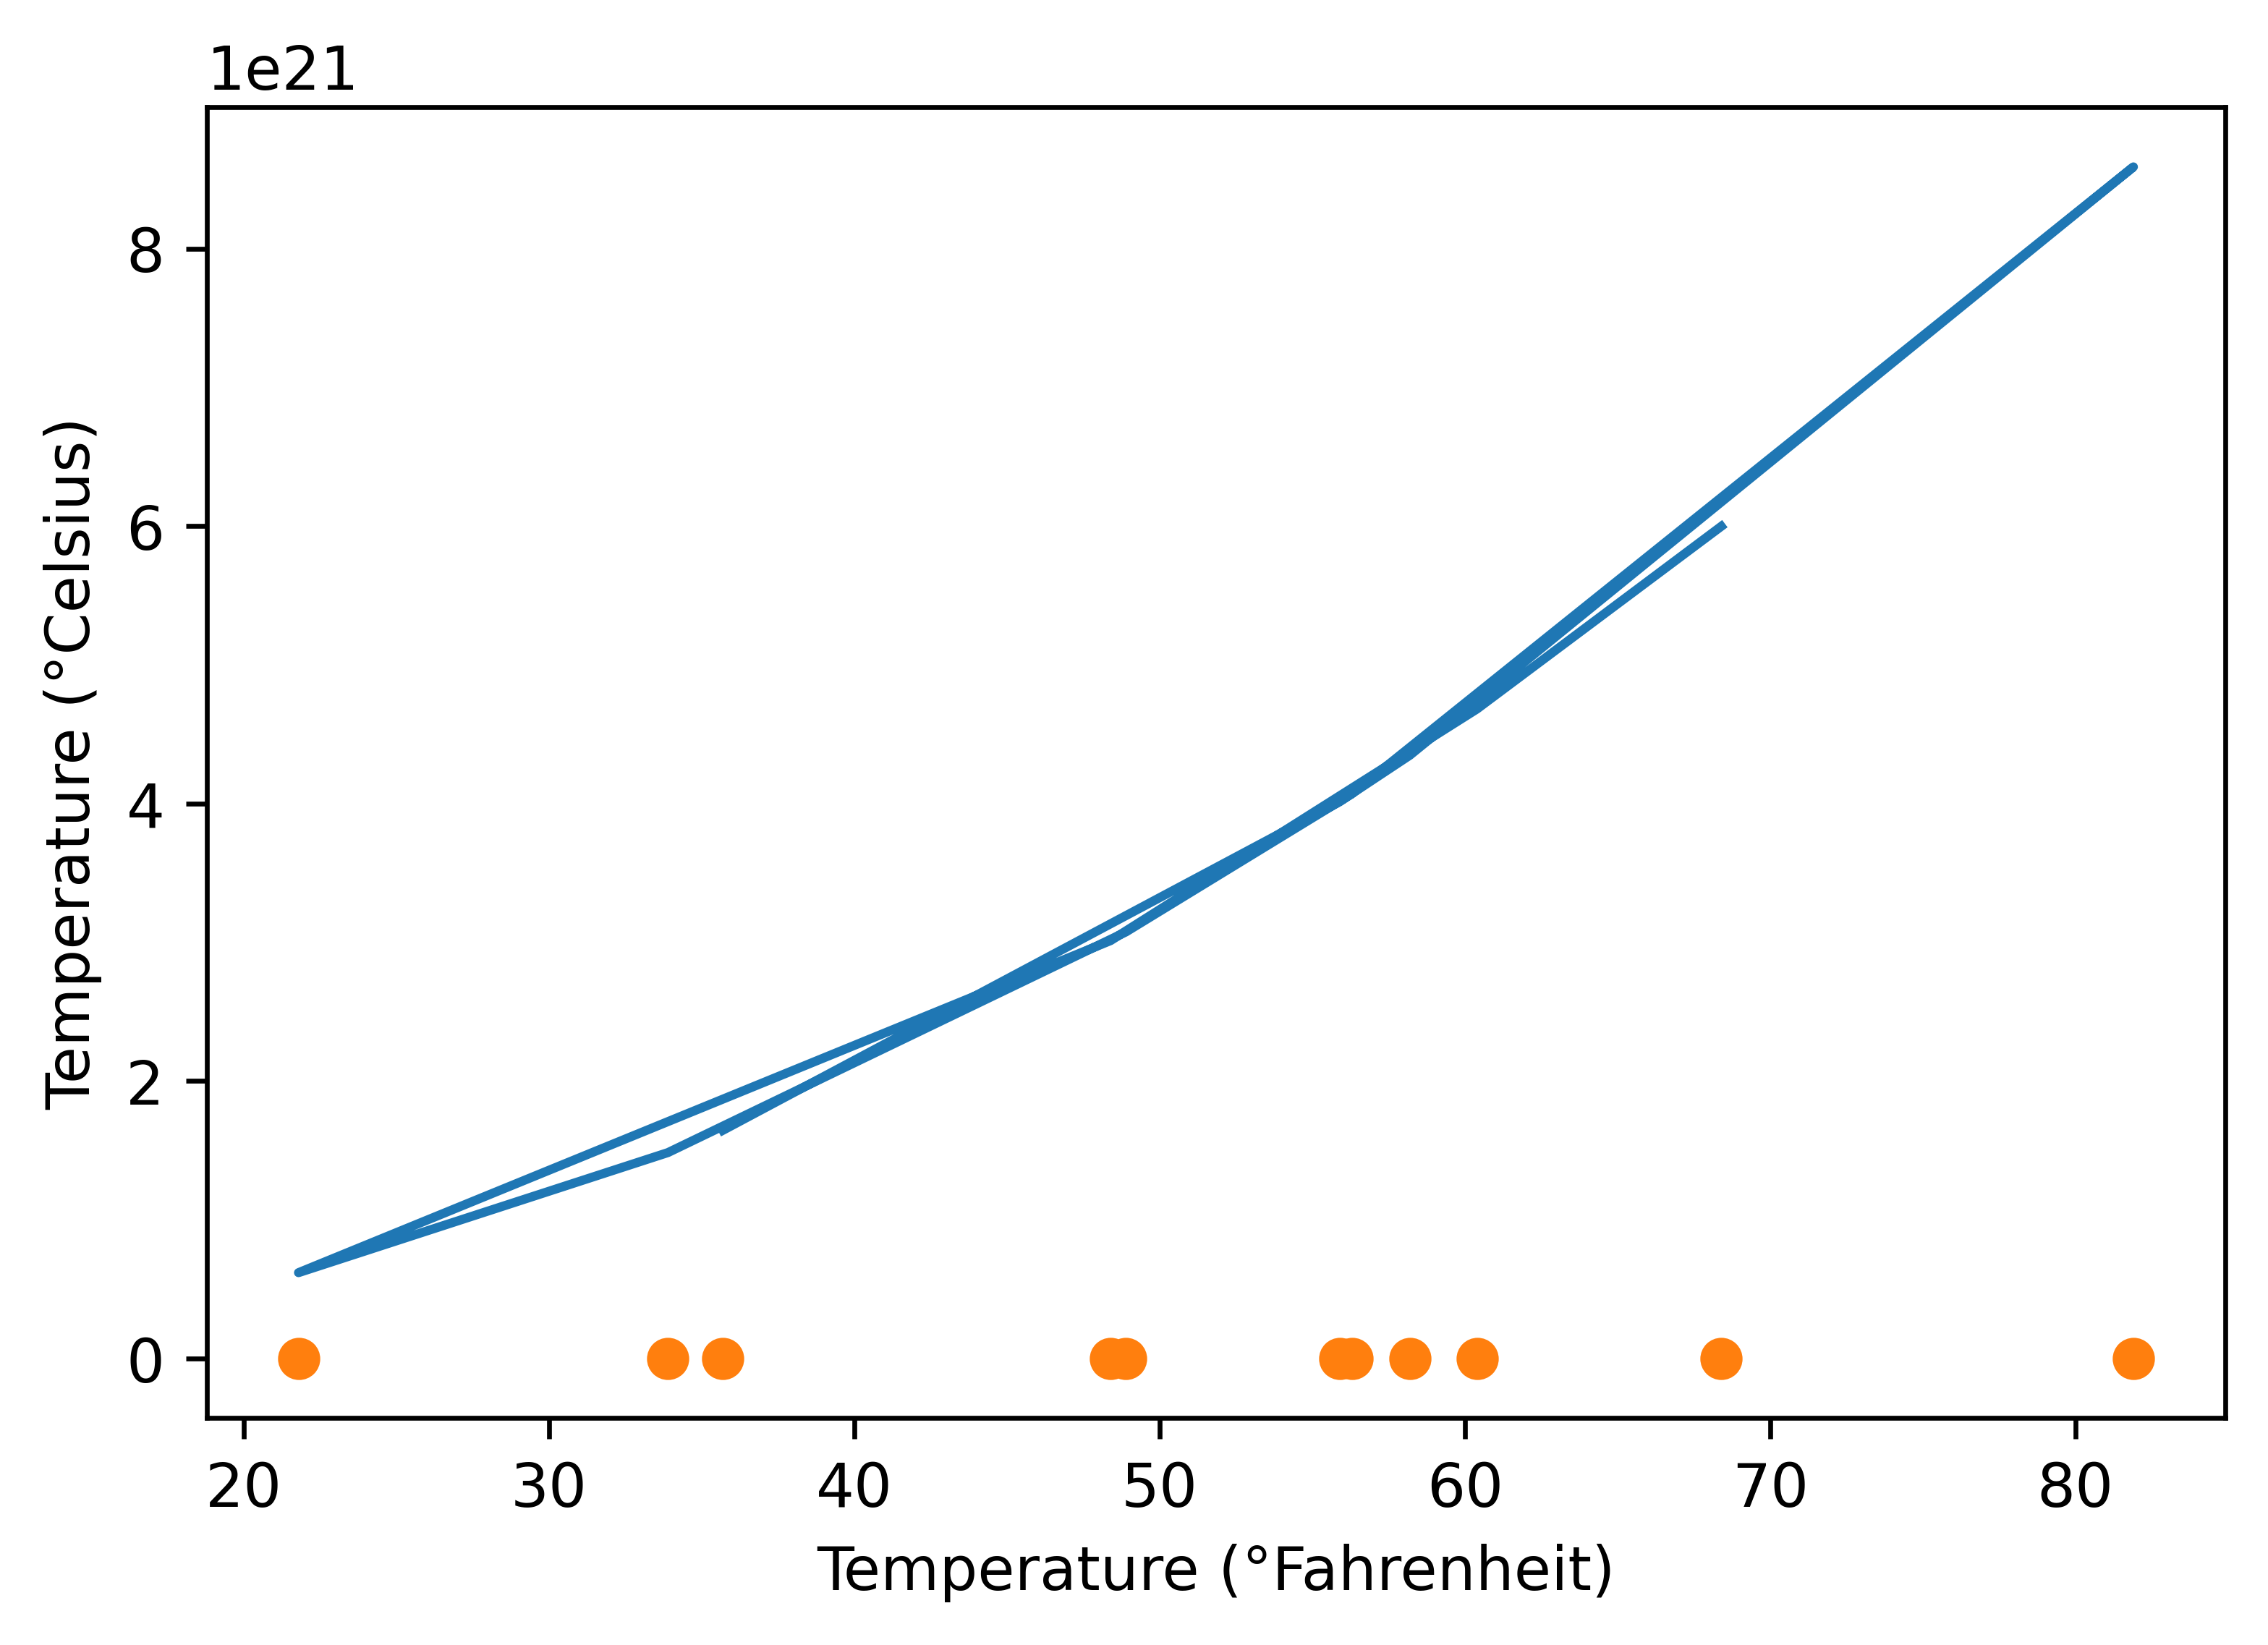

In [255]:
%matplotlib inline

w1, w2, b = params
from matplotlib import pyplot as plt

t_p = model(t_u, w1, w2, b)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

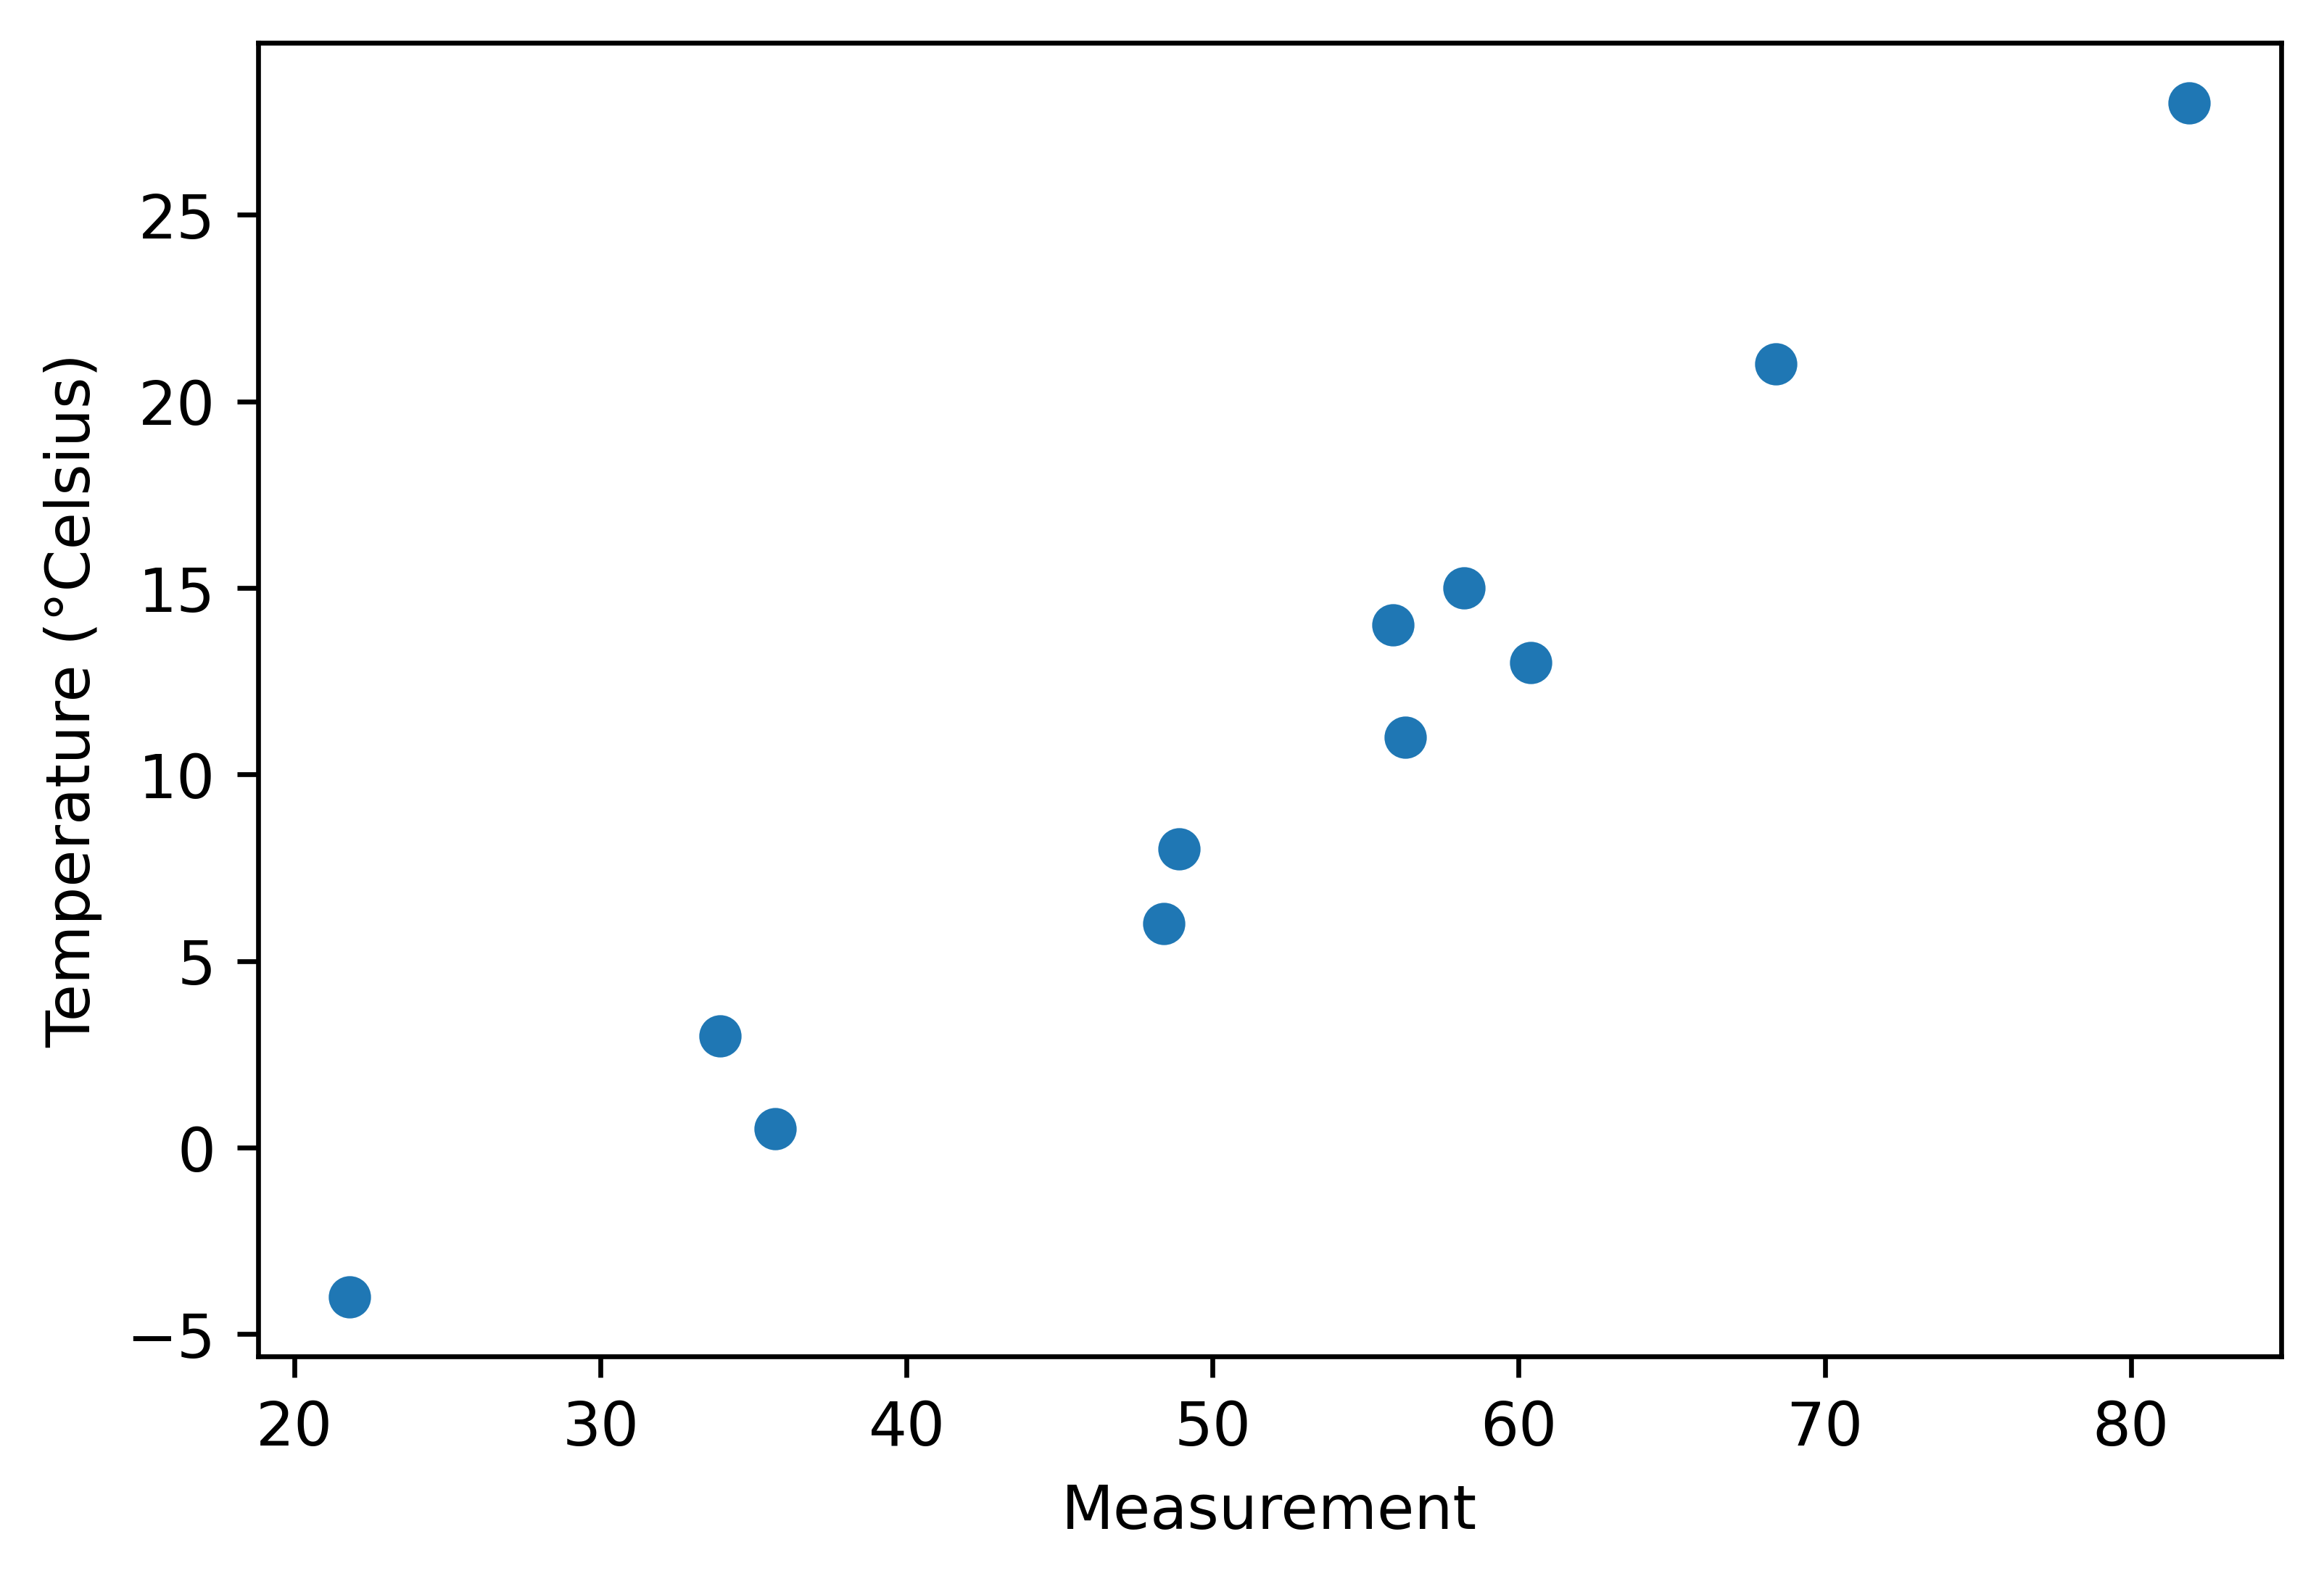

In [256]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")